In [2]:
import numpy as np

import wf_psf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns


In [3]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [4]:
poly_metrics_file = '../wf-outputs/metrics/metrics-polymodel_poly_d_max_{}.npy'
graph_metrics_file = '../wf-outputs/metrics/metrics-graphmodel_graph_ft_{}.npy'
saving_folder ='../figures/'

In [5]:
d_max_list = [7, 10, 12, 15]
graph_ft_list = [15, 29, 14, 30]

poly_metrics_dict_list = [np.load(poly_metrics_file.format(d_max), allow_pickle=True)[()] for d_max in d_max_list]
graph_metrics_dict_list = [np.load(graph_metrics_file.format(n_ft), allow_pickle=True)[()] for n_ft in graph_ft_list]



In [6]:
polyc_rmse_poly, polyc_std_rmse_poly, polyc_rel_rmse_poly, polyc_std_rel_rmse_poly = wf_psf.script_utils.extract_poly_results(poly_metrics_dict_list)
polyc_rmse_graph, polyc_std_rmse_graph, polyc_rel_rmse_graph, polyc_std_rel_rmse_graph = wf_psf.script_utils.extract_poly_results(graph_metrics_dict_list)

In [7]:
opd_rmse_poly, opd_std_rmse_poly, opd_rel_rmse_poly, opd_std_rel_rmse_poly = wf_psf.script_utils.extract_opd_results(poly_metrics_dict_list)
opd_rmse_graph, opd_std_rmse_graph, opd_rel_rmse_graph, opd_std_rel_rmse_graph = wf_psf.script_utils.extract_opd_results(graph_metrics_dict_list)

In [8]:
#e1, e2, R2 = wf_psf.script_utils.extract_shape_results(poly_metrics_dict_list)

In [9]:
pix_rmse_poly, pix_std_rmse_poly, pix_rel_rmse_poly, pix_std_rel_rmse_poly = wf_psf.script_utils.extract_shape_pix_results(poly_metrics_dict_list)
pix_rmse_graph, pix_std_rmse_graph, pix_rel_rmse_graph, pix_std_rel_rmse_graph = wf_psf.script_utils.extract_shape_pix_results(graph_metrics_dict_list)


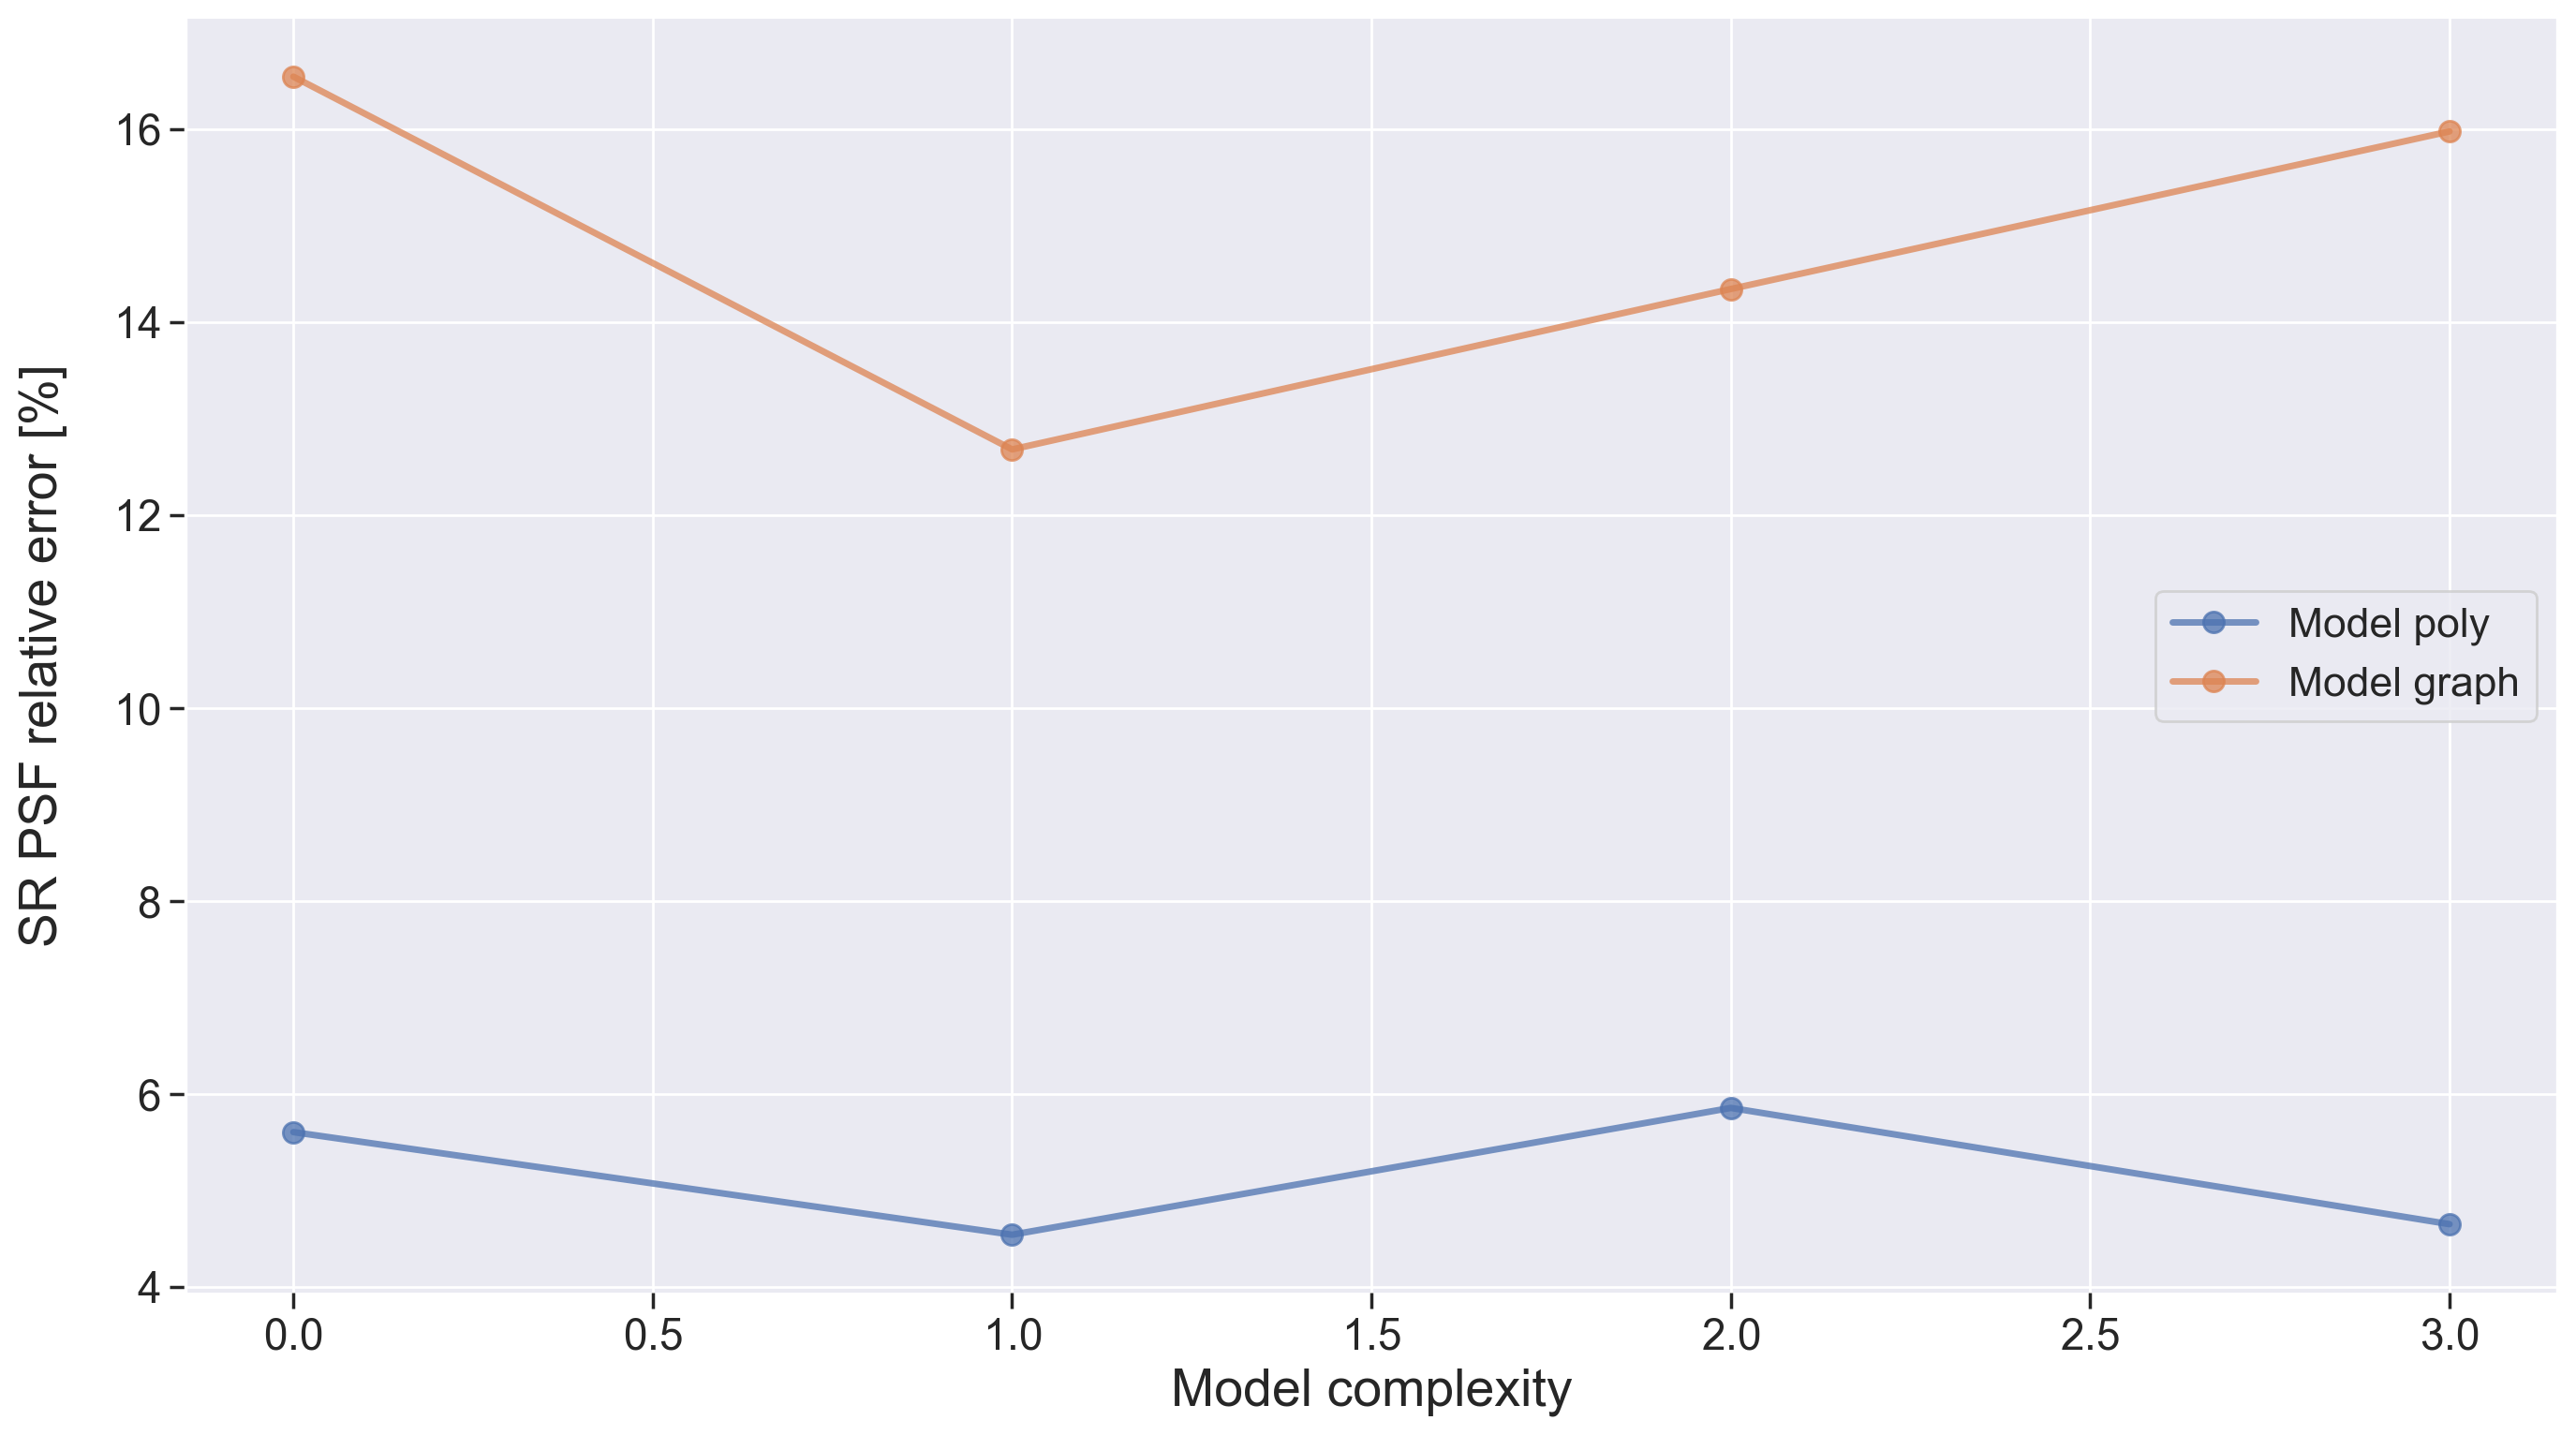

In [10]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(pix_rel_rmse_poly, label='Model poly', **kwargs)
ax1.plot(pix_rel_rmse_graph, label='Model graph', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('SR PSF relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Model complexity', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

In [11]:
print('Model poly errors : ',pix_rel_rmse_poly)
print('Model graph errors :',pix_rel_rmse_graph)

Model poly errors :  [5.60871065 4.5456931  5.85950464 4.65491191]
Model graph errors : [16.54358506 12.68159747 14.34339583 15.97596109]


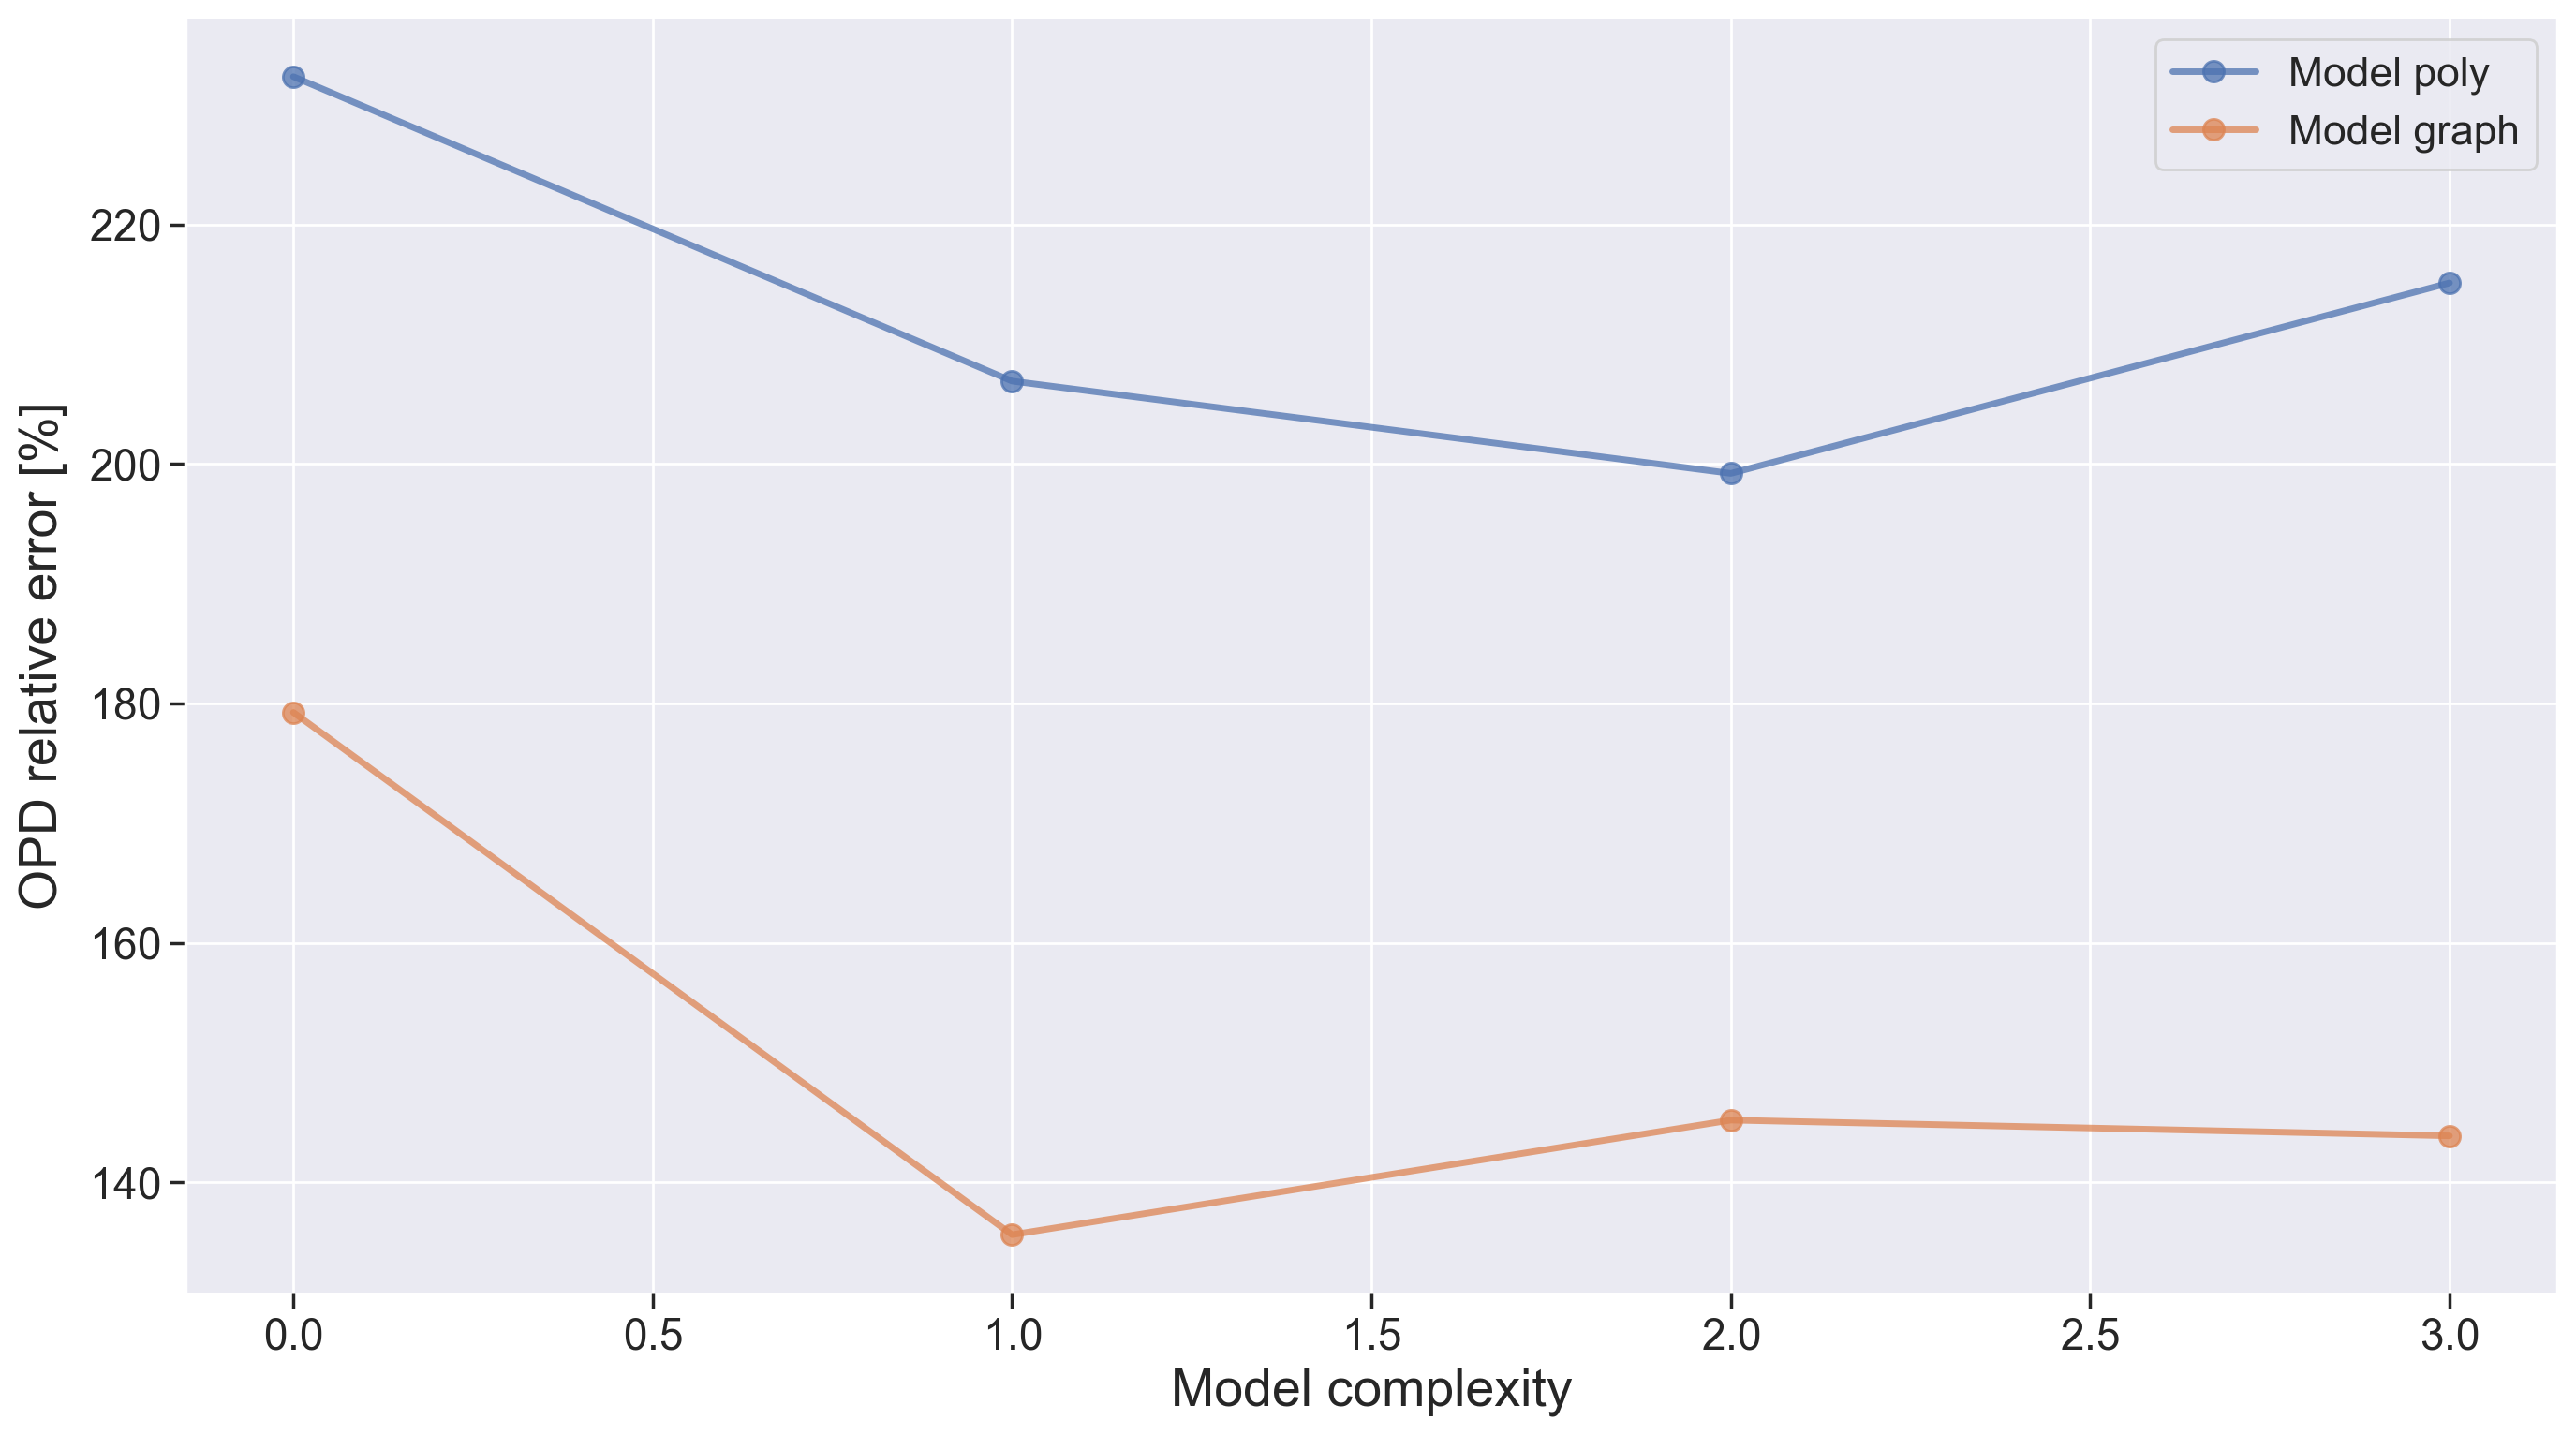

In [12]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(opd_rel_rmse_poly, label='Model poly', **kwargs)
ax1.plot(opd_rel_rmse_graph, label='Model graph', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('OPD relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Model complexity', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

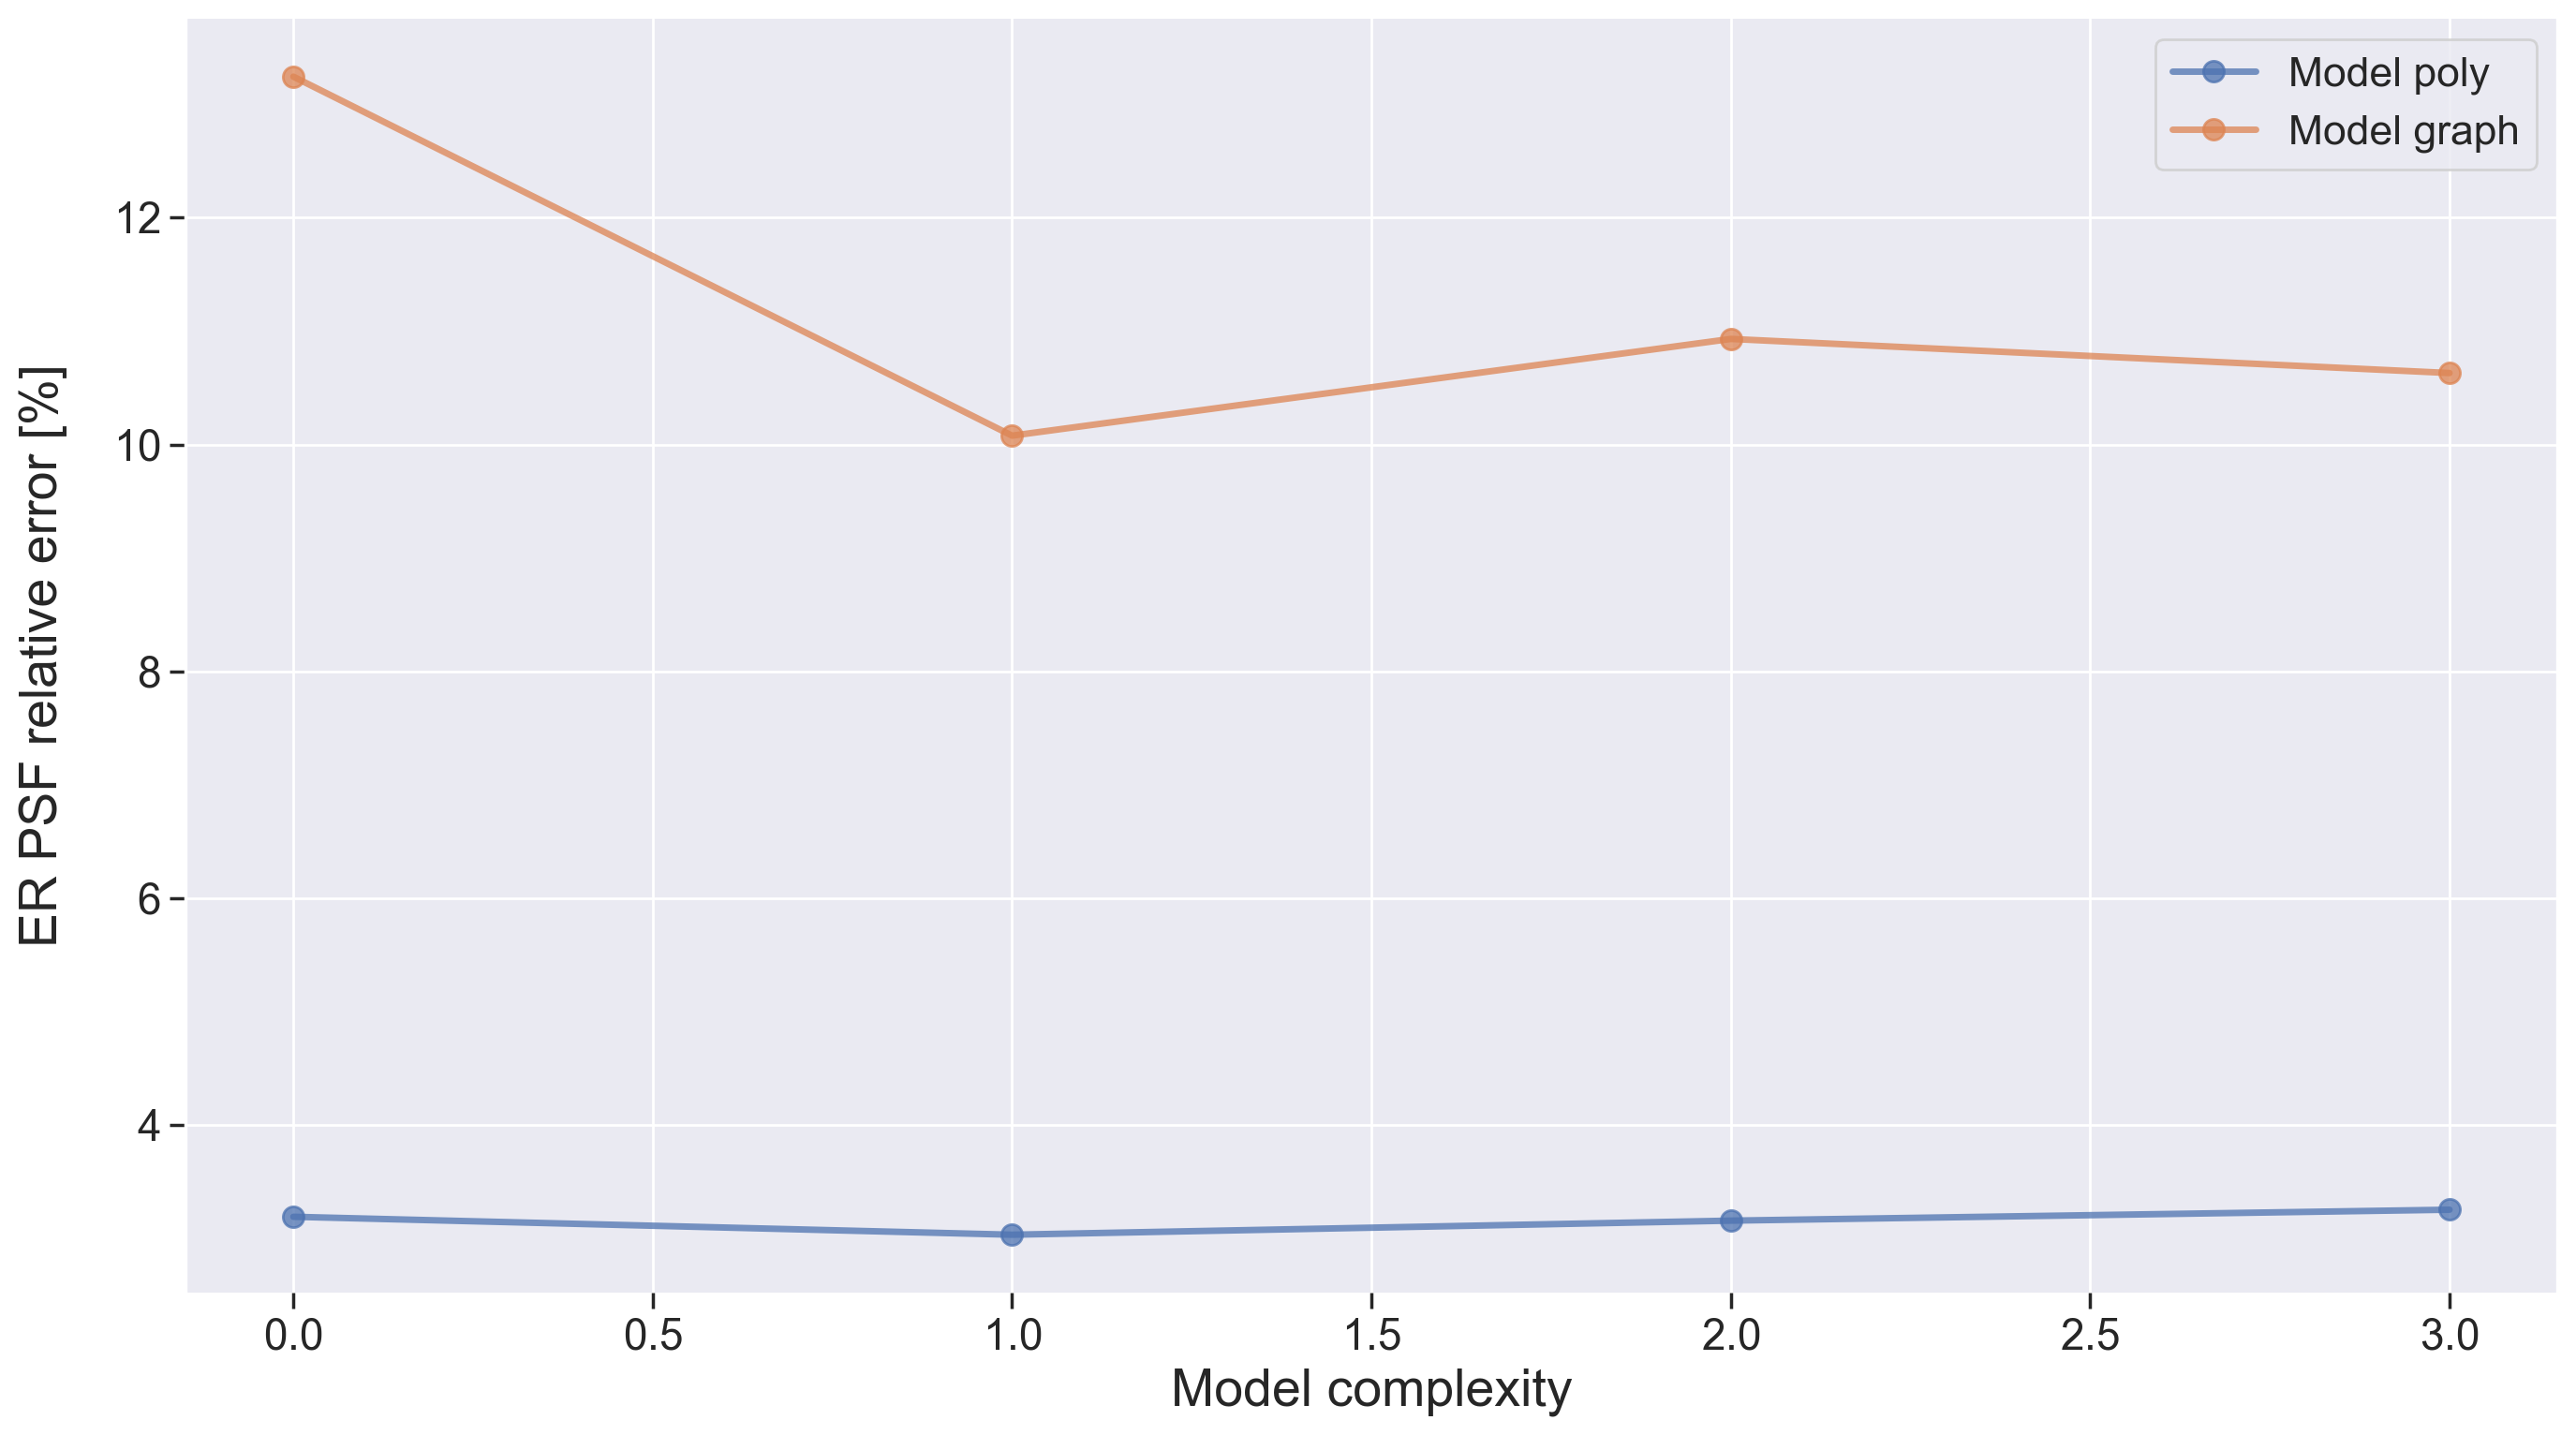

In [13]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(polyc_rel_rmse_poly, label='Model poly', **kwargs)
ax1.plot(polyc_rel_rmse_graph, label='Model graph', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('ER PSF relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Model complexity', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

In [14]:
print('Model poly errors : ',polyc_rel_rmse_poly)
print('Model graph errors :',polyc_rel_rmse_graph)

Model poly errors :  [3.19149122 3.03323511 3.15738842 3.25376354]
Model graph errors : [13.24326098 10.07802412 10.93078256 10.63008755]
